In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def patchToBin (magpatch, anglepatch):
    #plt.imshow (magpatch)
    #plt.show()
    binSize = 9
    binRes = np.zeros (9)
    
    for y in range(magpatch.shape[0]):
        for x in range(magpatch.shape[1]):
            #print (y, x)
            left = anglepatch[y][x]/20
            right = left + 1
            if right > 8:
                right = 0
            diff = anglepatch[y][x]%20
            diff2 = 20 - diff
            #print("angle", anglepatch[y][x])
            #print (left)
            #print (right)
            binRes [int(left)] =  magpatch[y][x] * diff/20 
            binRes [int(right)] = magpatch[y][x] * diff2/20
    
    return binRes

def normalizeBin (patchBins):
    
    res = sum(map(lambda i : i * i, patchBins)) 
    res = np.sqrt (res)
    
    return patchBins/res 

def getHOGfeatures(image):
    img = cv2.resize (image, (64, 128))
    #plt.imshow (img)
    #plt.show()
    
    img = np.float32(img) / 255.0
    
    # Calculate gradient
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
    
    #print (gx.shape)
    # Python Calculate gradient magnitude and direction ( in degrees )
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    
    #plt.imshow (mag)
    #plt.show()
    #plt.imshow (angle)
    #plt.show()
    

    #merge channels
    mag1 = np.zeros((mag.shape[0], mag.shape[1]))
    angle1 = np.zeros((angle.shape[0], angle.shape[1]))
    for y in range(mag1.shape[0]):
        for x in range(mag1.shape[1]):
            #print (y, x)
            maxMag = mag[y][x][0]
            maxAngle = angle[y][x][0]
            if mag[y][x][1]> maxMag:
                maxMag = mag[y][x][1]
                maxAngle = angle[y][x][1]
            if mag[y][x][2]> maxMag:
                maxMag = mag[y][x][2]
                maxAngle = angle[y][x][2]
            mag1[y][x] = maxMag
            angle1[y][x] = maxAngle
    
    #binning
    angle1 = angle1%180
    patchSize = 8#25
    allBins = np.zeros (( int(128/8),int(64/8), 9))
    for y in range(0,img.shape[0], patchSize):
        for x in range(0,img.shape[1], patchSize):
            curr_y = int (y/patchSize)
            curr_x = int (x/patchSize)
            allBins[curr_y][curr_x] = patchToBin (mag1[y:y+patchSize, x:x+patchSize], angle1[y:y+patchSize, x:x+patchSize])

    #print (allBins.shape)
    
    #normalize
    normBins = np.zeros ((allBins.shape))
    acc =[]
    for y in range (0, allBins.shape[0]-1, 1):
        for x in range (0, allBins.shape[1]-1, 1):
            #print (y," ", x)
            #normBins[y:y+2,x:x+2] = normalizeBin (allBins[y:y+2,x:x+2])
            temp = normalizeBin (allBins[y:y+2,x:x+2]).flatten()
            acc.append(temp)
            #print (temp.shape)
    acc = np.asmatrix(acc)
    #print (acc.shape)
    #print (acc.flatten().shape)
    return acc.flatten()

In [43]:
#positive
#ntrain = 100#200
#N = ntrain + 700#500 #400#200#100#6
#C = 3780 #100 * 100
#samples = np.zeros ((N, C),  np.float32)
#responses = np.ones ((N), np.int32)
#for i in range (ntrain):
#    filename = "{:05d}.png".format(i)
#    print (filename)
    
#    img = cv2.imread("00000-20201121T135044Z-001/00000/cropped_resized/"+filename)
#    samples[i] = getHOGfeatures(img)
#    samples[i] = np.nan_to_num (samples[i])
    #print (samples[i])
    #array_sum = np.sum(samples[i])
    #array_has_nan = np.isnan(array_sum)

N = 400 + 700
C = 3780 
samples = np.zeros ((N, C),  np.float32)
responses = np.ones ((N), np.int32)

i = 0
directory = "dataset/smaller_set_faces_64x128"
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"): 
        thePath = os.path.join(directory, filename)
        print(thePath)
        img = cv2.imread(thePath)
        samples[i] =getHOGfeatures(img)
        samples[i] = np.nan_to_num (samples[i])
        responses[i]=1
        i = i +1
        continue
    else:
        continue
        
print (responses)


directory = "dataset/nonfaces"
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"): 
        thePath = os.path.join(directory, filename)
        print(thePath)
        img = cv2.imread(thePath)
        samples[i] =getHOGfeatures(img)
        samples[i] = np.nan_to_num (samples[i])
        responses[i]=0
        i = i +1
        continue
    else:
        continue
        
print (responses)
    



dataset/smaller_set_faces_64x128\00001.png
dataset/smaller_set_faces_64x128\00002.png
dataset/smaller_set_faces_64x128\00003.png


<ipython-input-2-c175cbc8eeb5>:29: RuntimeWarning: invalid value encountered in true_divide
  return patchBins/res


dataset/smaller_set_faces_64x128\00010.png
dataset/smaller_set_faces_64x128\00012.png
dataset/smaller_set_faces_64x128\00013.png
dataset/smaller_set_faces_64x128\00014.png
dataset/smaller_set_faces_64x128\00016.png
dataset/smaller_set_faces_64x128\00018.png
dataset/smaller_set_faces_64x128\00027.png
dataset/smaller_set_faces_64x128\00030.png
dataset/smaller_set_faces_64x128\00047.png
dataset/smaller_set_faces_64x128\00059.png
dataset/smaller_set_faces_64x128\00064.png
dataset/smaller_set_faces_64x128\00066.png
dataset/smaller_set_faces_64x128\00067.png
dataset/smaller_set_faces_64x128\00110.png
dataset/smaller_set_faces_64x128\00113.png
dataset/smaller_set_faces_64x128\00114.png
dataset/smaller_set_faces_64x128\00119.png
dataset/smaller_set_faces_64x128\00128.png
dataset/smaller_set_faces_64x128\00133.png
dataset/smaller_set_faces_64x128\00134.png
dataset/smaller_set_faces_64x128\00140.png
dataset/smaller_set_faces_64x128\00143.png
dataset/smaller_set_faces_64x128\00144.png
dataset/sma

dataset/nonfaces\00230.png
dataset/nonfaces\00231.png
dataset/nonfaces\00232.png
dataset/nonfaces\00233.png
dataset/nonfaces\00234.png
dataset/nonfaces\00235.png
dataset/nonfaces\00236.png
dataset/nonfaces\00237.png
dataset/nonfaces\00238.png
dataset/nonfaces\00239.png
dataset/nonfaces\00240.png
dataset/nonfaces\00241.png
dataset/nonfaces\00242.png
dataset/nonfaces\00243.png
dataset/nonfaces\00244.png
dataset/nonfaces\00245.png
dataset/nonfaces\00246.png
dataset/nonfaces\00247.png
dataset/nonfaces\00248.png
dataset/nonfaces\00249.png
dataset/nonfaces\00250.png
dataset/nonfaces\00251.png
dataset/nonfaces\00252.png
dataset/nonfaces\00253.png
dataset/nonfaces\00254.png
dataset/nonfaces\00255.png
dataset/nonfaces\00256.png
dataset/nonfaces\00257.png
dataset/nonfaces\00258.png
dataset/nonfaces\00259.png
dataset/nonfaces\00260.png
dataset/nonfaces\00261.png
dataset/nonfaces\00262.png
dataset/nonfaces\00263.png
dataset/nonfaces\00264.png
dataset/nonfaces\00265.png
dataset/nonfaces\00266.png
d

dataset/nonfaces\00536.png
dataset/nonfaces\00537.png
dataset/nonfaces\00538.png
dataset/nonfaces\00539.png
dataset/nonfaces\00540.png
dataset/nonfaces\00541.png
dataset/nonfaces\00542.png
dataset/nonfaces\00543.png
dataset/nonfaces\00544.png
dataset/nonfaces\00545.png
dataset/nonfaces\00546.png
dataset/nonfaces\00547.png
dataset/nonfaces\00548.png
dataset/nonfaces\00549.png
dataset/nonfaces\00550.png
dataset/nonfaces\00551.png
dataset/nonfaces\00552.png
dataset/nonfaces\00553.png
dataset/nonfaces\00554.png
dataset/nonfaces\00555.png
dataset/nonfaces\00556.png
dataset/nonfaces\00557.png
dataset/nonfaces\00558.png
dataset/nonfaces\00559.png
dataset/nonfaces\00560.png
dataset/nonfaces\00561.png
dataset/nonfaces\00562.png
dataset/nonfaces\00563.png
dataset/nonfaces\00564.png
dataset/nonfaces\00565.png
dataset/nonfaces\00566.png
dataset/nonfaces\00567.png
dataset/nonfaces\00568.png
dataset/nonfaces\00569.png
dataset/nonfaces\00570.png
dataset/nonfaces\00571.png
dataset/nonfaces\00572.png
d

In [44]:
SVM = cv2.ml.SVM_create()
SVM.setType(cv2.ml.SVM_C_SVC)
SVM.setKernel(cv2.ml.SVM_LINEAR)
#SVM.setKernel(cv2.ml.SVM_RBF)
SVM.setTermCriteria((cv2.TERM_CRITERIA_COUNT, 100, 1.e-06))

SVM.train(samples, cv2.ml.ROW_SAMPLE, responses)
SVM.save("REFACTORED.yml")




In [45]:
#test on training data
#model2 = cv2.ml.SVM_load('HOPE_SMILE.yml')
model2 = cv2.ml.SVM_load('REFACTORED.yml')
#model2 = cv2.ml.SVM_load('THE_FIRST_ATTEMPT.yml')

output = model2.predict(samples)
print(output)

(0.0, array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32))


test_samples_2\face1.jpg


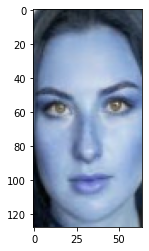

THE RESULT (0.0, array([[1.]], dtype=float32))
test_samples_2\face2.jpg


<ipython-input-2-c175cbc8eeb5>:29: RuntimeWarning: invalid value encountered in true_divide
  return patchBins/res


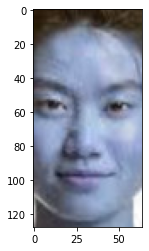

THE RESULT (0.0, array([[0.]], dtype=float32))
test_samples_2\face3.jpg


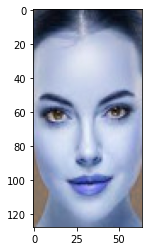

THE RESULT (0.0, array([[1.]], dtype=float32))
test_samples_2\random.jpg


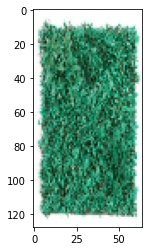

THE RESULT (0.0, array([[0.]], dtype=float32))
test_samples_2\random2.jpg


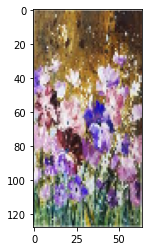

THE RESULT (0.0, array([[0.]], dtype=float32))
test_samples_2\random2_resized.jpg


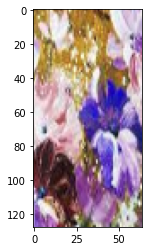

THE RESULT (0.0, array([[0.]], dtype=float32))
test_samples_2\random3.jpg


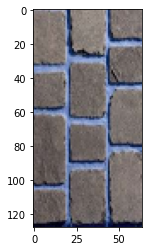

THE RESULT (0.0, array([[0.]], dtype=float32))
test_samples_2\random3_resized.jpg


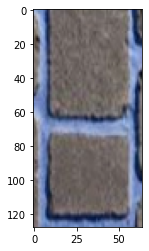

THE RESULT (0.0, array([[0.]], dtype=float32))
test_samples_2\random_resized.jpg


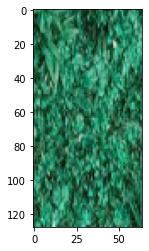

THE RESULT (0.0, array([[0.]], dtype=float32))


In [46]:
#test on test data
C = 3780
tests = np.zeros ((1, C),  np.float32)
directory = "test_samples_2"
i = 0
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"): 
        thePath = os.path.join(directory, filename)
        print(thePath)
        image = cv2.imread(thePath)
        img = cv2.resize (image, (64, 128))
        plt.imshow (img)
        plt.show()
        tests[0]=getHOGfeatures(img)
        #print (test[0])
        tests[0] = np.nan_to_num (tests[0])
        
        output = model2.predict(tests, 1)
        print("THE RESULT", output)

        i=i+1
        continue
    else:
        continue
        


<ipython-input-2-c175cbc8eeb5>:29: RuntimeWarning: invalid value encountered in true_divide
  return patchBins/res


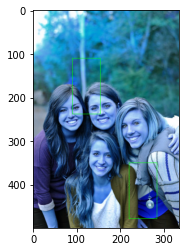

True

In [47]:
width = 64
height = 128

i=0
searchMe =  cv2.imread("searchMe_resized.jpg")
#searchMe = cv2.resize (searchMe, (int(searchMe.shape[1]*1.25), int(searchMe.shape[0]*1.25)))
outputPic = searchMe.copy()

for x in range (0, searchMe.shape[1]- width, 10 ):
    for y in range(0, searchMe.shape[0] -height, 10 ):
        img = searchMe[y:y+height,x:x+width ]
        
        tests[0]=getHOGfeatures(img)
        #print (test[0])
        tests[0] = np.nan_to_num (tests[0])
        
        output = model2.predict(tests)
        #print (output[1][0][0])
        #if output[1][0][0] == 0:
        #    outputPic = cv2.rectangle(outputPic, (x, y), (x+width, y+height), (0,0,255), 1)
        #elif output[1][0][0] == 1:
        if output[1][0][0] == 1:
            outputPic = cv2.rectangle(outputPic, (x, y), (x+width, y+height), (0,255,0), 1)
        #    filename = "{:05d}.png".format(i)
        #    cv2.imwrite ("negative_samples/from_test/"+filename, img)
        #    i=i+1
        #else:
        #    print ("ERROR")

plt.imshow (outputPic)
plt.show()
cv2.imwrite ("OUTPUT_OUTPUT.jpg", outputPic)

In [28]:
def detect_face(img):
    #convert the test image to gray scale as opencv face detector expects gray images
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #load OpenCV face detector, I am using LBP which is fast
    #there is also a more accurate but slow: Haar classifier
    face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')

    #let's detect multiscale images(some images may be closer to camera than others)
    #result is a list of faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);

    #if no faces are detected then return original img
    if (len(faces) == 0):
        return None, None

    for i in range(len(faces)):
        #under the assumption that there will be only one face,
        #extract the face area
        (x, y, w, h) = faces[i]
        
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 1)

    plt.imshow (img)
    plt.show()
        
    #return only the face part of the image
    #return gray[y:y+w, x:x+h], faces[0]
    return


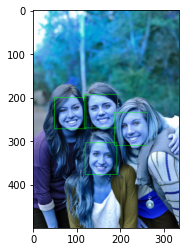

In [29]:
searchMe =  cv2.imread("searchMe_resized.jpg")
detect_face (searchMe)